# Applied Machine Learning: Module 3 (evaluation)

## Evaluation for classification

### Preamble

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

dataset = load_digits()

X, y = dataset.data, dataset.target

for class_name, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
    print(class_name, class_count)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


In [2]:
# Creating a dataset with imbalanced binary classes
# Negatice class (0) is 'not digit 1'
# Positive class (1) is 'digit 1'

y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print('Original labels :\t', y[1:30])
print('New binary labels:\t', y_binary_imbalanced[1:30])

Original labels :	 [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New binary labels:	 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [3]:
np.bincount(y_binary_imbalanced)

array([1615,  182])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

from sklearn.svm import SVC

clf = SVC(kernel='rbf', C=1)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9088888888888889

### Dummy classifiers 

DummyClassifier is a classifier that make predictions using simple rules, which can be useful as a baseline for comparaison against actual classifiers especially with imbalanced classes 

In [5]:
from sklearn.dummy import DummyClassifier

# Negative class (0) is the most frequent
dummy_majority = DummyClassifier(strategy='most_frequent')
dummy_majority.fit(X_train, y_train)

y_dummy_prediction = dummy_majority.predict(X_train)
y_dummy_prediction

array([0, 0, 0, ..., 0, 0, 0])

In [6]:
dummy_majority.score(X_test, y_test)

0.9044444444444445

In [7]:
svm = SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.9777777777777777

### Confusion matrices

#### Binary (two-class) confusion matrix

In [8]:
from sklearn.metrics import confusion_matrix

# Negative class 0 is most frequent
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_majority_predicted)

print('Most frequent class (dummy classifier)\n', confusion)

Most frequent class (dummy classifier)
 [[407   0]
 [ 43   0]]


In [9]:

dummy_classpro = DummyClassifier(strategy='stratified').fit(X_train, y_train)
y_classpro_predicted = dummy_classpro.predict(X_test)
confusion = confusion_matrix(y_test, y_classpro_predicted)

print('Random class-proportional prediction (dummy classifier)\n', confusion)

Random class-proportional prediction (dummy classifier)
 [[372  35]
 [ 34   9]]


In [10]:
svm = SVC(kernel='rbf', C=1).fit(X_train, y_train)
svm_prediction = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_prediction)

print('SVM prediciton (Linear kernel, C= 1)\n', confusion)

SVM prediciton (Linear kernel, C= 1)
 [[407   0]
 [ 41   2]]


In [11]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train, y_train)
y_logistic_prediction = clf.predict(X_test)
confusion = confusion_matrix(y_test, y_logistic_prediction)

print('Logistic regression classifier (default settings)\n', confusion)

Logistic regression classifier (default settings)
 [[401   6]
 [  6  37]]


In [12]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
tree_predicitions = tree_clf.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicitions)

print('Decision tree classifier (max_depth = 2)\n', confusion)

Decision tree classifier (max_depth = 2)
 [[400   7]
 [ 17  26]]


## Evaluation metrics for binary classification

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = (TP + TN) / (TP + FP + TN + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)
# F1_score  = 2 * Precision * Recall / (Precision + Recall)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, tree_predicitions)))
print('Precision: {:.2f}'.format(precision_score(y_test, tree_predicitions)))
print('Recall: {:.2f}'.format(recall_score(y_test, tree_predicitions)))
print('F1_Score: {:.2f}'.format(f1_score(y_test, tree_predicitions)))

Accuracy: 0.95
Precision: 0.79
Recall: 0.60
F1_Score: 0.68


In [14]:
# Combined report with all above metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, tree_predicitions, target_names=['not 1', '1']))

             precision    recall  f1-score   support

      not 1       0.96      0.98      0.97       407
          1       0.79      0.60      0.68        43

avg / total       0.94      0.95      0.94       450



In [15]:
print('Random class-proportional (dummy) \n',
     classification_report(y_test, y_classpro_predicted, target_names=['not 1', '1']))

print('SVM \n',
     classification_report(y_test, svm_prediction, target_names=['not 1', '1']))

print('Logistic Regression \n',
     classification_report(y_test, y_logistic_prediction, target_names=['not 1', '1']))

print('Decision tree \n',
     classification_report(y_test, tree_predicitions, target_names=['not 1', '1']))

Random class-proportional (dummy) 
              precision    recall  f1-score   support

      not 1       0.92      0.91      0.92       407
          1       0.20      0.21      0.21        43

avg / total       0.85      0.85      0.85       450

SVM 
              precision    recall  f1-score   support

      not 1       0.91      1.00      0.95       407
          1       1.00      0.05      0.09        43

avg / total       0.92      0.91      0.87       450

Logistic Regression 
              precision    recall  f1-score   support

      not 1       0.99      0.99      0.99       407
          1       0.86      0.86      0.86        43

avg / total       0.97      0.97      0.97       450

Decision tree 
              precision    recall  f1-score   support

      not 1       0.96      0.98      0.97       407
          1       0.79      0.60      0.68        43

avg / total       0.94      0.95      0.94       450



## Decision function

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

lr_clf = LogisticRegression().fit(X_train, y_train)
y_scores_lr = lr_clf.decision_function(X_test)

y_score_list = list(zip(y_test[0:20], y_scores_lr[0:20]))
y_score_list

[(0, -23.172292973469546),
 (0, -13.542576515500063),
 (0, -21.717588760007867),
 (0, -18.90306513331644),
 (0, -19.733169947138638),
 (0, -9.746321749674767),
 (1, 5.2327155658831135),
 (0, -19.308012306288916),
 (0, -25.099330209728528),
 (0, -21.824312362996),
 (0, -24.14378275072049),
 (0, -19.578811099762508),
 (0, -22.5683713932802),
 (0, -10.822590225240777),
 (0, -11.907918741521932),
 (0, -10.977026853802803),
 (1, 11.206811164226373),
 (0, -27.64415761980748),
 (0, -12.857692102545409),
 (0, -25.8481491402402)]

In [24]:
y_proba_lr = lr_clf.predict_proba(X_test)
y_proba_list = list(zip(y_test[0:20], y_proba_lr[0:20, 1]))

y_proba_list

[(0, 8.637757922060678e-11),
 (0, 1.3138118599563783e-06),
 (0, 3.699738603909953e-10),
 (0, 6.1730972504865465e-09),
 (0, 2.6914925394345074e-09),
 (0, 5.850605777114361e-05),
 (1, 0.9946893464440469),
 (0, 4.1175302368500096e-09),
 (0, 1.257475089425303e-11),
 (0, 3.325229075466887e-10),
 (0, 3.2695529799373086e-11),
 (0, 3.1407283576084884e-09),
 (0, 1.580086411715015e-10),
 (0, 1.9943442430612578e-05),
 (0, 6.7368003023860014e-06),
 (0, 1.7089540581641637e-05),
 (1, 0.9999864188091131),
 (0, 9.869494034019548e-13),
 (0, 2.6059983600823893e-06),
 (0, 5.9469113009063784e-12)]

# Precision recall curve

/home/djaballah/PythonEnv/PFE/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


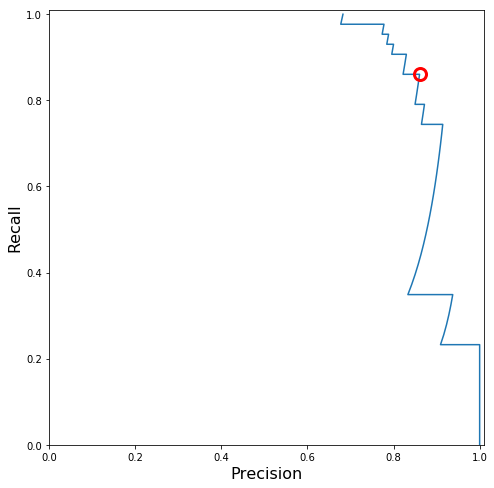

In [26]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure(figsize=(14, 8))
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-recall-curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize=12, fillstyle='none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()
